# Machine Learning from Scatch 

## Perceptron Model 

### Perceptron Object Oriented API

**Perceptron** : Perceptron is a learning technique based on how neurons work in biological organisms . 

 Neurons are interconnected nerve cells in the brain that are involved in the processing and transmitting of chemical and electrical signals, which is illustrated in the following figure:
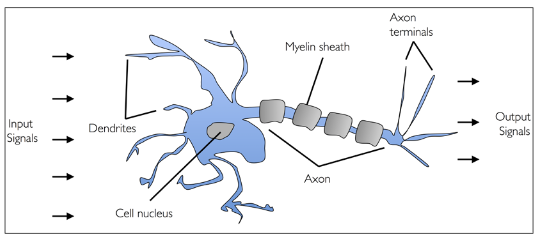

a nerve cell as a simple logic gate with binary outputs; multiple signals arrive at the dendrites, are then integrated into the cell body, and, if the accumulated signal exceeds a certain threshold, an output signal is generated that will be passed on by the axon.

Frank Rosenblatt published the first concept of the perceptron learning rule based on the MCP neuron model (The Perceptron: A Perceiving and Recognizing Automaton, F. Rosenblatt, Cornell Aeronautical Laboratory, 1957). With his perceptron rule, Rosenblatt proposed an algorithm that would automatically learn the optimal weight coefficients that are then multiplied with the input features in order to make the decision of whether a neuron fires or not.

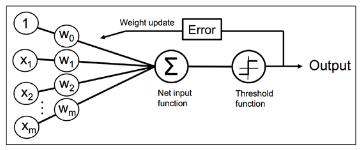

#### Input Function

Formally, we can put the idea behind artificial neurons into the context of a binary classification task where we refer to our two classes as 1 (positive class) and -1 (negative class) for simplicity. We can then define a decision function $\phi(z) $ that takes a linear combination of certain input values $x$ and a corresponding weight vector $w$, where $z$ is the so-called net input.
The negative threshold, or weight, $w_{0}=-\theta$ is usually called the bias unit,
here $x_{0}=1$

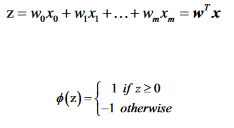



#### Weight Update

The output value is the class label predicted by the unit step function that we defined earlier, and the simultaneous update of each weight $w_{j}$ in the weight vector $w$ can be more formally written as:

Where $\eta$ is the learning rate (typically a constant between 0.0 and 1.0), $y^{(i)}$ is the true class label of the ith training sample, and $\hat y^{(i)}$ is the predicted class label.

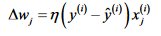

The following figure illustrates how the net input is squashed into a binary output (-1 or 1) by the **decision function or threshold function** of the perceptron (left subfigure) and how it can be used to discriminate between two linearly separable classes (right subfigure)

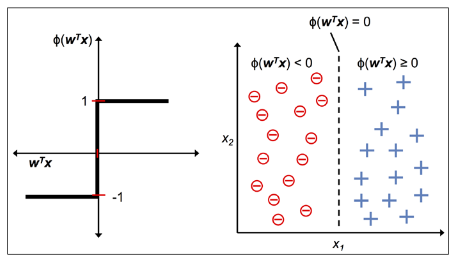

**Perceptron Model Object Oriented API**

In [23]:

import numpy as np

class Perceptron(object):
    """
    Parameters
    ----------
    eta : float
        learning rate(between 0.0 and 1.0)
    n_eter : int
        Passes over the learning rate
    random_state : int
        Random number generator seed for random weight
        initilization
    
    Attributes
    ------------
    w_ : 1d-Array
        Weights after fiting
    errors_ list
        Number of misclasiification (updates) in each epoch
    """

    def __init__(self,eta = 0.01,n_iter=50,random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self,X,y):
        """
        Fit the training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples,n_features]
        Training vectors, where n_samples is the number of
        samples and n_features is the number of features.

        y : array-like, shape = [n_samples]
        Target values

        Returns
        -------
        self : object 
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                              size = 1 + X.shape[1])
        
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi,target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self,X):
        """Calculating the net Input """
        return np.dot(X,self.w_[1:]) + self.w_[0]
    def predict(self,X):
        """ Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0,1,-1)
            

**Data Set Import**

In [24]:
import pandas as pd
df = pd.read_csv('iris.csv',header=None)

In [25]:
df.head(10)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


**Ploting the Data**

In [26]:
import matplotlib.pyplot as plt

In [27]:
y = df.iloc[0:100,4].values
y = np.where(y=='Iris-setosa',-1,1)

In [28]:
X = df.iloc[0:100,[0,2]].values

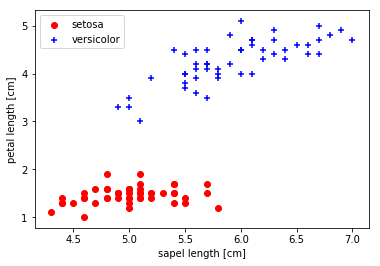

In [29]:
plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='blue',marker='+',label='versicolor')
plt.xlabel('sapel length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

**Ploting the Epoch vs Error**

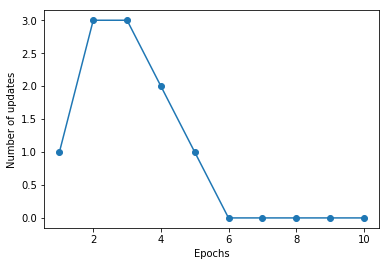

In [30]:
ppn = Perceptron(eta=0.1,n_iter=10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

**Ploting Decision Boundary**

In [44]:
from matplotlib.colors import ListedColormap
      
def plot_decision_regions(X,y,classifier,resolution=0.02):
    """
    Plots the decision boundary
    """
    

    #setup marker generator and color map
    markers = ['o','x','s','^','v']
    colors = ['red','blue','lightgreen','gray','cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))])

    #plot the decision surface
    x1_min,x1_max = X[:,0].min() - 1,X[:,0].max() + 1
    x2_min,x2_max = X[:,1].min() - 1,X[:,1].max() + 1

    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                          np.arange(x2_min,x2_max,resolution))

    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    #plot class sample
    for idx,c1 in enumerate(np.unique(y)):
        plt.scatter(x=X[y == c1,0],
                    y=X[y == c1, 1],
                    alpha = 0.8,
                    c=colors[idx],
                    marker = markers[idx],
                    label=c1,
                    edgecolor='black')    

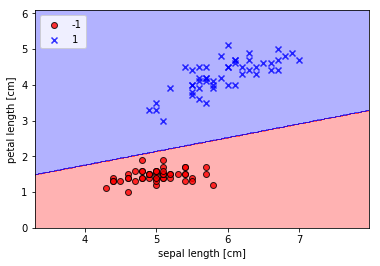

In [45]:
plot_decision_regions(X,y,classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

### ADAptive LInear NEuron (Adaline) Model

As the linear Perceptron is very simple and can not work well with complex problems,there is a new upgraded model known as **ADAptive LInear NEuron (Adaline)**.
The key difference between the Adaline rule (also known as the Widrow-Hoff rule) and Rosenblatt's perceptron is that the weights are updated based on a linear activation function rather than a unit step function like in the perceptron. In Adaline, this linear activation function $\phi(z)$ is simply the identity function of the net input, so that:
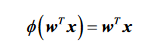

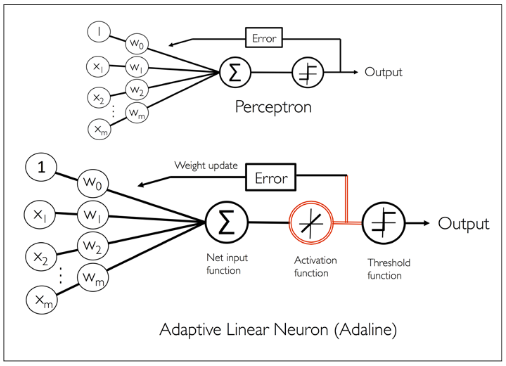

The illustration shows that the Adaline algorithm compares the true class labels with the linear activation function's continuous valued output to compute the model error and update the weights. In contrast, the perceptron compares the true class labels to the predicted class labels.

One of the key ingredients of supervised machine learning algorithms is a defined objective function that is to be optimized during the learning process. This objective function is often a cost function that we want to minimize. In the case of Adaline, we can define the cost function $J$ to learn the weights as the **Sum of Squared Errors(SSE)** between the calculated outcome and the true class label:
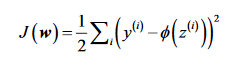

A property of this cost function is that it is convex; thus, we can use a simple yet powerful optimization algorithm called gradient descent to find the weights that minimize our cost function to classify the samples in the Iris dataset.

As illustrated in the following figure, we can describe the main idea behind gradient descent as climbing down a hill until a local or global cost minimum is reached. In each iteration, we take a step in the opposite direction of the gradient where the step size is determined by the value of the learning rate, as well as the slope of the gradient:

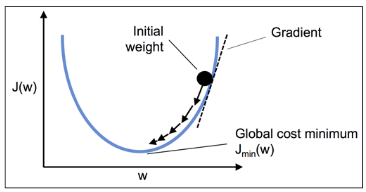

now here unlike perceptron the weight change $\Delta w$ is defined as the negative gradient multiplied by the learning rate $\eta$

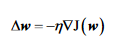


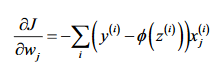

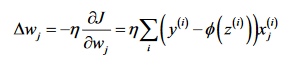

**Adaline Model Object Oriented API**

In [33]:
import numpy as np

class AdalineGD(object):
    """
    ADAptive LInear NEuron classifier
    
    
    Parameters
    ----------
    eta : float
        learning rate(between 0.0 and 1.0)
    n_eter : int
        Passes over the learning rate
    random_state : int
        Random number generator seed for random weight
        initilization
    
    Attributes
    ------------
    w_ : 1d-Array
        Weights after fiting
    cost_ : list
        Sum of squared cost value in each epoch.
    """

    def __init__(self,eta = 0.01,n_iter=50,random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self,X,y):
        """
        Fit the training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples,n_features]
        Training vectors, where n_samples is the number of
        samples and n_features is the number of features.

        y : array-like, shape = [n_samples]
        Target values

        Returns
        -------
        self : object 
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                              size = 1 + X.shape[1])
        
        self.cost_ = []

        for _ in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (1/2) * (errors**2).sum()
            self.cost_.append(cost)
        return self

    def activation(self,X):
        """Calculate linear activation"""
        return X
    def net_input(self,X):
        """Calculating the net Input """
        return np.dot(X,self.w_[1:]) + self.w_[0]
    def predict(self,X):
        """ Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0,1,-1)
            

**Ploting the Epoch v/s Sum Squared Error(SSE) with different learning rate** 

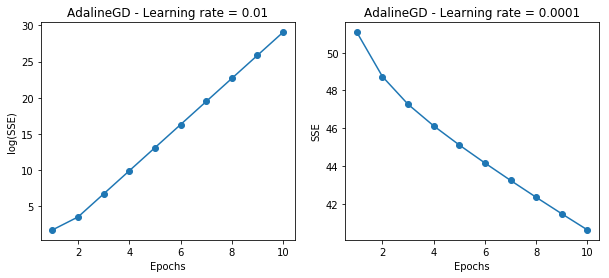

In [42]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
ada1 = AdalineGD(n_iter=10,eta=0.01).fit(X,y)
ax[0].plot(range(1,len(ada1.cost_)+1),np.log10(ada1.cost_),marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(SSE)')
ax[0].set_title('AdalineGD - Learning rate = 0.01')
ada2 = AdalineGD(n_iter=10,eta=0.0001).fit(X,y)
ax[1].plot(range(1,len(ada2.cost_)+1),(ada2.cost_),marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('SSE')
ax[1].set_title('AdalineGD - Learning rate = 0.0001')
plt.show()

As we can see in the resulting cost-function plots, we encountered two different types of problem. The left chart shows what could happen if we choose a learning rate that is too large. Instead of minimizing the cost function, the error becomes larger in every epoch, because we overshoot the global minimum. On the other hand, we can see that the cost decreases on the right plot, but the chosen learning rate 0.0001η= is so small that the algorithm would require a very large number of epochs to converge to the global cost minimum

**Using Feature scalling to normalize the values**

Gradient descent is one of the many algorithms that benefit from feature scaling. In this section, we will use a feature scaling method called standardization, which gives our data the property of a standard normal distribution, which helps gradient descent learning to converge more quickly. Standardization shifts the mean of each feature so that it is centered at zero and each feature has a standard deviation of 1. For instance, to standardize the $j$th feature, we can simply subtract the sample mean $\mu_{j}$ from every training sample and divide it by its standard deviation $\sigma_{j}$
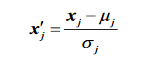

In [35]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()

**Ploting the decision boundary with normalized values and learning rate = 0.01**

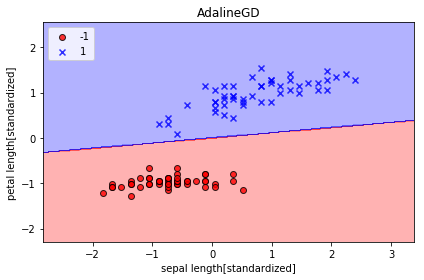

In [36]:
ada = AdalineGD(n_iter=15,eta=0.01)
ada.fit(X_std,y)
plot_decision_regions(X_std,y,classifier=ada)
plt.title('AdalineGD')
plt.xlabel("sepal length[standardized]")
plt.ylabel("petal length[standardized]")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

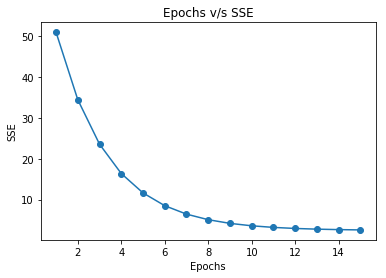

In [37]:
plt.plot(range(1,len(ada.cost_)+1),ada.cost_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('SSE')
plt.title('Epochs v/s SSE')
plt.show()

### Adaline - Stochastic Gradient Descent

We learned how to minimize a cost function by taking a step in the opposite direction of a cost gradient that is calculated from the whole training set; this is why this approach is sometimes also referred to as **batch gradient descent**. Now imagine we have a very large dataset with millions of data points, which is not uncommon in many machine learning applications. Running batch gradient descent can be computationally quite costly in such scenarios since we need to reevaluate the whole training dataset each time we take one step towards the global minimum.

A popular alternative to the batch gradient descent algorithm is **stochastic gradient descent**, sometimes also called iterative or online gradient descent. Instead of updating the weights based on the sum of the accumulated errors over all  samples $x^{(i)}$:

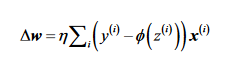

We update the weights incrementally for each training sample

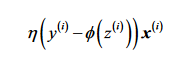

**Adaline - Stochastic Gradient**

In [38]:
import numpy as np

class AdalineSGD(object):
    """
    ADAptive LInear NEuron classifier
    
    
    Parameters
    ----------
    eta : float
        learning rate(between 0.0 and 1.0)
    n_eter : int
        Passes over the learning rate
    random_state : int
        Random number generator seed for random weight
        initilization
    shuffle : bool
        Shuffles the training data if True to prevent
        cycles.
    
    
    Attributes
    ------------
    w_ : 1d-Array
        Weights after fiting
    cost_ : list
        Sum of squared cost value  averaged over 
        all training samples in each epoch.
    """

    def __init__(self,eta = 0.01,n_iter=50,shuffle=True,random_state=None):
        
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.shuffle = shuffle
        self.w_initialized = True
        
    def fit(self,X,y):
        """
        Fit the training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples,n_features]
        Training vectors, where n_samples is the number of
        samples and n_features is the number of features.

        y : array-like, shape = [n_samples]
        Target values

        Returns
        -------
        self : object 
        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            if self.shuffle:
                X,y = self._shuffle(X,y)
            cost = []
            for xi,target in zip(X,y):
                cost.append(self._update_weights(xi,target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def _shuffle(self,X,y):
        """Shuffle the input data"""
        r = self.rgen.permutation(len(y))
        return X[r],y[r]
    
    def _initialize_weights(self,m):
        """Initialize the weight to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01,
                              size = 1 + m)
        self.w_initialized = True
      
    def _update_weights(self,xi,target):
        """Apply Adaline rule to uptade weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = (1/2) * (error**2)
        return cost
            
        
        
    def activation(self,X):
        """Calculate linear activation"""
        return X
    def net_input(self,X):
        """Calculating the net Input """
        return np.dot(X,self.w_[1:]) + self.w_[0]
    def predict(self,X):
        """ Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0,1,-1)
            

**Ploting the Decision Boundary**

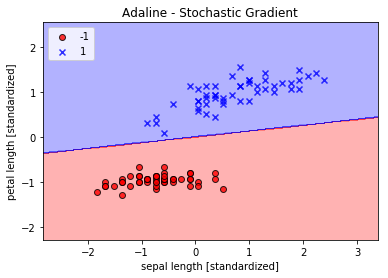

In [39]:
ada = AdalineSGD(n_iter=15,eta=0.01,random_state=1)
ada.fit(X_std,y)

plot_decision_regions(X_std,y,classifier=ada)
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.title('Adaline - Stochastic Gradient')
plt.legend(loc='upper left')
plt.show()

**Epoch vs Average Cost**

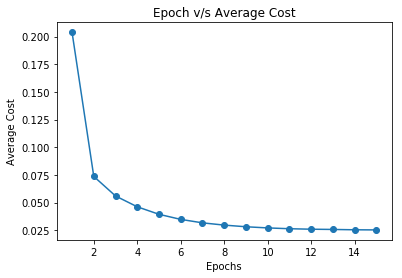

In [40]:
plt.plot(range(1,len(ada.cost_)+1),ada.cost_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.title('Epoch v/s Average Cost')
plt.show()

**Reference**
- Python Machine Learning - 2nd Edition by _*Sebastian Raschka and Vahid Mirjalili*_